## Question 2

I used this site https://www.researchgate.net/figure/Females-as-a-percent-of-all-non-CEO-top-executives-and-as-a-percent-of-all-CEOs_fig2_235310605

In [29]:
import os
import cv2
import numpy as np
import wget

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import io
import urllib

import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image
from tqdm.notebook import tqdm
import pandas as pd


Mount drive



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install (patched) package

In [2]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git --upgrade

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-vwu70c8i
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-vwu70c8i
     |████████████████████████████████| 911kB 6.4MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15792 sha256=ccc7bd5cfb32adaab5c3c0ff177ac4f2c24342a5890d039ce283adf5d552ade3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ej6vt0u7/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


Parameters

In [4]:
MY_QUERY = "CEO"
N_IMAGES = 80
OUTPUT_DIR = '/content/drive/MyDrive/Q2'

Download images

In [5]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload() 
arguments = {"keywords": MY_QUERY,
             "limit": N_IMAGES, # 5 images
             "output_ todirectory":OUTPUT_DIR,
             "print_urls":True}   
paths = response.download(arguments) 


Item no.: 1 --> Item name = CEO
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Group_of_Fortune_500_CEOs_in_2015_%28cropped_to_remove_non-CEO%29.jpg/220px-Group_of_Fortune_500_CEOs_in_2015_%28cropped_to_remove_non-CEO%29.jpg
Completed Image ====> 1.220px-group_of_fortune_500_ceos_in_2015_%28cropped_to_remove_non-ceo%29.jpg
Image URL: https://s3.amazonaws.com/utep-uploads/wp-content/uploads/sparkle-box/2019/04/30112737/Female-CEO.jpg
Completed Image ====> 2.female-ceo.jpg
Image URL: https://personalexcellence.co/files/ceo.jpg
Completed Image ====> 3.ceo.jpg
Image URL: https://www.europeanceo.com/wp-content/uploads/2017/08/CEO-magic-touch.jpg
Completed Image ====> 4.ceo-magic-touch.jpg
Image URL: https://mms.businesswire.com/media/20200218005271/en/773989/5/Odilon_Almeida_Headshot_1.jpg
Completed Image ====> 5.odilon_almeida_headshot_1.jpg
Image URL: https://www.mckinsey.com/~/media/McKinsey/Business%20Functions/McKinsey%20Digital

Print first image

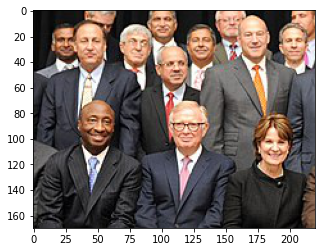

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(paths[0][MY_QUERY][0])) # prints our first image

Remove faulty images

In [9]:
import os
from PIL import Image

OUTPUT_DIR_QUERY = os.path.join(OUTPUT_DIR, MY_QUERY)
for filename in os.listdir(OUTPUT_DIR_QUERY):
    output_dir_file = os.path.join(OUTPUT_DIR_QUERY, filename)
    try :
        with Image.open(output_dir_file) as im:
             print('ok')
    except :
        print(output_dir_file)
        os.remove(output_dir_file)
            

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


I download the pictures into my local pc

In [ ]:
df_Path = r"C:\Users\pc\Desktop\MASTER COURSES\Block 2\Data Mining\Exams lab 2\Question 2\CEO"

In [30]:
def load_image_from_path(df_Path, target_size=None, color_mode='rgb'):
    pil_image = image.load_img(df_Path, 
                               target_size=target_size,
                            color_mode=color_mode)
    pil_image_df = pd.DataFrame(pil_image)
    return image.img_to_array(pil_image_df)

In [32]:
print(pil_image_df)

NameError: name 'pil_image_df' is not defined

In [ ]:
def apply_offsets(face_coordinates, offsets):
    """
    Derived from https://github.com/oarriaga/face_classification/blob/
    b861d21b0e76ca5514cdeb5b56a689b7318584f4/src/utils/inference.py#L21
    """
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

gender_classifier = load_model('/content/drive/MyDrive/5.2/gender_mini_XCEPTION.21-0.95.hdf5') # load this only once! (not in a loop)
GENDER_OFFSETS = (10, 10)
INPUT_SHAPE_GENDER = gender_classifier.input_shape[1:3]

In [8]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
model_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
face_model = wget.download(model_url)

face_classification = cv2.CascadeClassifier(model_url) # load the classifier only once!


In [25]:

for file in tqdm(df_Path):
    try:
        checklist = []
        loaded_pic = load_image_from_path(r'C:\Users\pc\Desktop\MASTER COURSES\Block 2\Data Mining\Exams lab 2\Question 2\CEO\\'+file, color_mode = 'grayscale')
        gray_pic = np.squeeze(loaded_pic).astype('uint8')
        faces = face_classification.detectMultiScale(gray_pic, 1.3, 5)
        n_faces.append(len(faces))
        labels = ['woman', 'man']
        if len(faces)<1:
            gender.append('None')
        else:
            for face_coordinates in faces: # using the output of the CascadeClassifier
                x1, x2, y1, y2 = apply_offsets(face_coordinates, GENDER_OFFSETS) # extends the bounding box
                face_img = gray_pic[y1:y2, x1:x2] # only get the face 
                face_img = cv2.resize(face_img, (INPUT_SHAPE_GENDER)) # resize the image
                face_img = face_img.astype('float32') / 255.0 # preprocess the image
                face_img = np.expand_dims(face_img, 0) # batch of one
                probas = gender_classifier.predict(face_img)
                checklist.append(labels[np.argmax(probas[0])])
        if len(set(checklist)) == 1:
            for gndr in set(checklist):
                gender.append(gndr)
        elif len(set(checklist)) == 2:
            gender.append('multiple')
    except:
        gender.append('error')
        print('Error.. continue')
        continue

NameError: name 'gender' is not defined